In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd gdrive/MyDrive/p1 

/content/gdrive/MyDrive/p1


In [3]:
!ls


0.0.Normal  code.doc  DR  project.ipynb  resized1


X_train shape: (20, 3, 128, 128)
20 train samples
5 test samples
Epoch 1/30
1/1 [==============================] - 11s 11s/step - loss: 0.6963 - accuracy: 0.5000
Epoch 2/30
1/1 [==============================] - 0s 28ms/step - loss: 0.6967 - accuracy: 0.5000
Epoch 3/30
1/1 [==============================] - 0s 26ms/step - loss: 0.6853 - accuracy: 0.5000
Epoch 4/30
1/1 [==============================] - 0s 27ms/step - loss: 0.6832 - accuracy: 0.6000
Epoch 5/30
1/1 [==============================] - 0s 24ms/step - loss: 0.6767 - accuracy: 0.7000
Epoch 6/30
1/1 [==============================] - 0s 31ms/step - loss: 0.6726 - accuracy: 0.5000
Epoch 7/30
1/1 [==============================] - 0s 22ms/step - loss: 0.6655 - accuracy: 0.7500
Epoch 8/30
1/1 [==============================] - 0s 24ms/step - loss: 0.6584 - accuracy: 0.7000
Epoch 9/30
1/1 [==============================] - 0s 38ms/step - loss: 0.6497 - accuracy: 0.7500
Epoch 10/30
1/1 [==============================] - 0s 22ms/ste

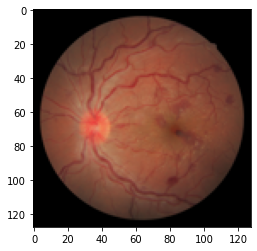

In [4]:
#KERAS
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils


import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
# import theano
from PIL import Image
from numpy import *
# SKLEARN
from sklearn.utils import shuffle
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

# input image dimensions
img_rows,img_cols = 128, 128

# number of channels

img_channels = 1
 
#%%
# data

#  ===============================================================================
# # NETWORK-1
#  =============================================================================

path1 = 'DR'         #path of folder of images

path2 = 'resized1'   #path of folder of images

img_rows=128
img_cols=128
listing = os.listdir(path1)
num_samples=size(listing) 

for file in listing:
    im = Image.open(path1 + '/' + file) 
    img = im. resize((img_rows, img_cols))
    gray = img
                #need to do some more processing here
    gray.save(path2 +'/' + file, "JPEG")

imlist = os.listdir(path2)

im1 = array(Image.open('resized1' + '/'+imlist[0])) # open one image to get size
m,n = im1.shape [0:2] # get the size of the images
imnbr = len(imlist) # get the number of images

#create matrix to store all flattened images
immatrix = array([array(Image.open('resized1'+ '/' +im2)).flatten()
              for im2 in imlist],'f')

label=np.ones ((num_samples, ), dtype = int)




# importing csv module
#import csv
#import pandas as pd

#excel_data_df = pd. read_csv('trainlabel.csv", usecols=['Retinopathy grade'])

#Label-excel_data_df[0:7];
                                                  
label=[0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0] 

data,Label = shuffle(immatrix, label, random_state=2)
train_data = [data, Label]

img-immatrix[8].reshape(img_rows, img_cols, 3)

plt.imshow(uint8(img))

#%%

#batch_size to train
batch_size = 32
# number of output classes
nb_classes = 2
# number of epochs to train
nb_epoch = 5


# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

#%%
(X, y) = (train_data[0], train_data[1])


# STEP 1: split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


X_train = X_train.reshape (X_train.shape [0], 3, img_rows, img_cols) 
X_test = X_test.reshape (X_test.shape[0], 3, img_rows, img_cols)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)  
print(X_train.shape [0], 'train samples')
print(X_test.shape [0], 'test samples')

 # convert class vectors to binary class matrices

Y_train = np_utils.to_categorical(y_train, nb_classes) 
Y_test = np_utils.to_categorical(y_test, nb_classes)


#plt.imshow(X_train[i, 0], interpolation='nearest')
#print ("Label: ", Y_train[i, :])




model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(3, 128, 128), data_format='channels_first'))
convout1 = Activation('relu')
model.add(convout1)

model.add(Conv2D(64, nb_conv, nb_conv))
convout2 = Activation('relu')
model.add (convout2)

model.add(MaxPool2D(pool_size=(nb_pool, nb_pool)))

# ============================================================================

model.add(Conv2D(128, nb_conv, nb_conv))
convout3 = Activation ('relu')
model.add(convout3)



model.add(MaxPool2D(pool_size=(nb_pool, nb_pool)))
model.add(Flatten())
model.add(Dense (128))
model.add (Activation ('relu'))
model.add(Dense(nb_classes))
model.add (Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#%%

#hist = model.fit(X_train, Y_train, batch_size-batch_size, nb_epoch=nb_epoch, 
 #             show_accuracy = True,verbose=1, validation_data=(X_test, Y_test))

epochs= 30;
hist= model.fit (X_train, Y_train, batch_size=batch_size, epochs=epochs, shuffle=True)




# imm- input("Enter your value: ")
# im1 = Image.open(imm)

# gray1 =iml

# input1= array( [array(gray1)])
# input1= array([array(gray1)])

# input2= array([array(gray1)])

# input3-array ( [input1, input1])


# al model. pred It_classes (input1.reshape (img_rows, img_cols, 3))

# if al == [0]:

#     print('THE OUPUT IS ----------------->>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
#     print("NORMAL")
# else:
#     print (THE OUPUT IS ----------------->>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
#     print("RETINOPATHY")


# # visualizing losses and accuracy

# train_Loss-hist.history['loss'] 
# #train_acc-histl.history['acc']
# #val_acc-hist1.history['val_acc']
# xc-range (epochs)



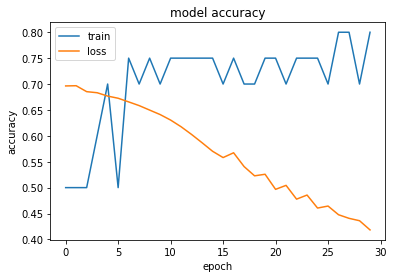

In [5]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'loss'], loc='upper left')
plt.show()

In [6]:
model.predict(X_test)

array([[0.82943237, 0.17056759],
       [0.31043422, 0.6895657 ],
       [0.32451096, 0.67548907],
       [0.4995602 , 0.50043976],
       [0.47700033, 0.5229997 ]], dtype=float32)